In [1]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
baseDadosZipada = ZipFile('instancia/data.zip', 'r')
infoList = baseDadosZipada.infolist()
listaArquivos = [infoList[x].filename for x in range(len(infoList))]
print("a quantidade de estações de medição é", len(listaArquivos))

a quantidade de estações de medição é 46


# Lista de Series diferentes que temos para trabalhar, precisamos ver o que fazer

## - por enquanto peguei a com maior número de anos

## - podiamos pegar considerando a geografia e estudando o efeito da vazão a montante na vazão a jusante

### o que é Vazão  (livro)
https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=28&ved=2ahUKEwjn-bjulPrgAhWwHbkGHc_aDfIQFjAbegQIDBAC&url=http%3A%2F%2Fpaginapessoal.utfpr.edu.br%2Feudesarantes%2Fdisciplinas%2Fhidrologia%2FMedicaodavazao.pdf%2Fat_download%2Ffile&usg=AOvVaw05KM00Baj2CJFJ1Cji679Q

In [3]:
Bases = [ pd.read_csv(baseDadosZipada.open(listaArquivos[x])) for x in range(1, len(listaArquivos))]
# print(Bases[0].columns)

In [4]:

# Bases[35]
indmaiorBase = np.argmax([len(base["Vazao"][(np.isreal(base["Vazao"])) ^ False]) for base in Bases])+1
print("a maior base de dados é a", listaArquivos[indmaiorBase])

a maior base de dados é a data/2345067_58060000.csv


In [5]:
# datas = [ pd.to_datetime(y['Data'][len(y)-1]) - pd.to_datetime(y['Data'][0]) for y in Bases]
# indmaiorBase = np.argmax(datas)
print( 'a maior base é', listaArquivos[indmaiorBase])
baseDados = pd.read_csv(baseDadosZipada.open(listaArquivos[indmaiorBase]))
baseDados['Data'] = pd.to_datetime(baseDados['Data'])
baseDados['Ano'] = [x.year for x in baseDados['Data']]
baseDados['Mes'] = [x.month for x in baseDados['Data']]
baseDados['Dia'] = [x.day for x in baseDados['Data']]
baseDados


a maior base é data/2345067_58060000.csv


,Data,Chuva,Vazao,Ano,Mes,Dia
0,1936-10-10,15.9,4.5060,1936,10,10
1,1936-10-11,6.0,9.6000,1936,10,11
2,1936-10-12,43.4,12.9400,1936,10,12
3,1936-10-13,1.2,7.1280,1936,10,13
4,1936-10-14,0.0,5.6400,1936,10,14
5,1936-10-15,0.0,4.9920,1936,10,15
6,1936-10-16,0.0,4.5060,1936,10,16
7,1936-10-17,0.0,4.1820,1936,10,17
8,1936-10-18,0.5,4.0200,1936,10,18
9,1936-10-19,0.0,4.0200,1936,10,19


# adicionei colunas com mes ano e dia e a estação de coleta que foi escolhida é a de "Ponte Alta 1" site para descobrir e verificar:

http://www.snirh.gov.br/hidroweb/publico/medicoes_historicas_abas.jsf 

In [6]:
baseDados['Vazao'].describe()

count    29039.000000
mean         8.338539
std          8.345548
min          2.230000
25%          4.878000
50%          6.595000
75%          9.600000
max        566.000000
Name: Vazao, dtype: float64

In [7]:
median = np.quantile(baseDados['Vazao'], 0.5)
distInterQuartil = np.quantile(baseDados['Vazao'], 0.75)  - np.quantile(baseDados['Vazao'], 0.25)
max = (median + 1.5*distInterQuartil)
min = (median - 1.5*distInterQuartil)
noutlierAbaixo = (  baseDados['Vazao'] > min)

noutlierAcima = ( baseDados['Vazao'] < max)
# outlier = outlierAbaixo or outlierAcima
nOutlier =  (noutlierAbaixo & noutlierAcima)

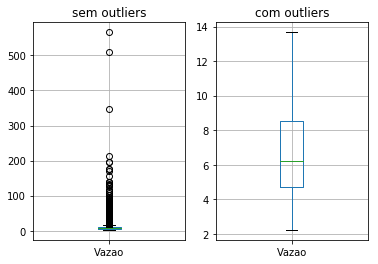

In [8]:
plt.subplot(122)
pd.DataFrame(baseDados['Vazao'][nOutlier]).boxplot()
plt.title("com outliers")
plt.subplot(121)
pd.DataFrame(baseDados['Vazao']).boxplot()
plt.title("sem outliers")
plt.show()

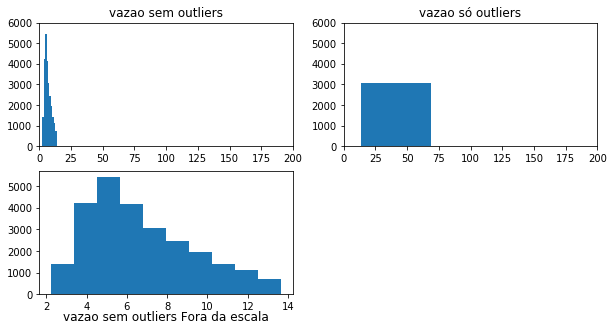

In [9]:

# print(max, min, baseDados['Vazao'][nOutlier])

# base = baseDados['Vazao'][Noutlier]

plt.figure(figsize=[10,5])

plt.subplot(221)
plt.hist(baseDados['Vazao'][nOutlier])
plt.title("vazao sem outliers")
plt.ylim([0, 6000])
plt.xlim([0, 200])
plt.subplot(222)
plt.hist(baseDados['Vazao'][~nOutlier])
plt.title("vazao só outliers")

plt.ylim([0, 6000])
plt.xlim([0, 200])
plt.subplot(223)
plt.hist(baseDados['Vazao'][nOutlier])
plt.title("vazao sem outliers Fora da escala", pad=-150)

plt.show()


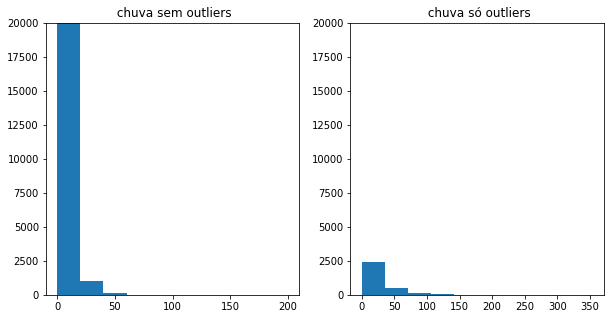

In [10]:
# base = baseDados['Vazao'][Noutlier]
plt.figure(figsize=[10,5])
plt.subplot(121)

plt.hist(baseDados['Chuva'][nOutlier])
plt.title(" chuva sem outliers")
plt.ylim([0,20000])
plt.subplot(122)
plt.hist(baseDados['Chuva'][~nOutlier])
plt.title(" chuva só outliers")
plt.ylim([0,20000])
plt.show()

# descricao da base
+ bacias com maior relação entre a chuva e a vazao pode ser mais semelhantes

In [11]:
import seaborn as sns
baseDados[['Vazao', 'Chuva']].corr()

,Vazao,Chuva
Vazao,1.00000,0.59691
Chuva,0.59691,1.00000


/home/gabriel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


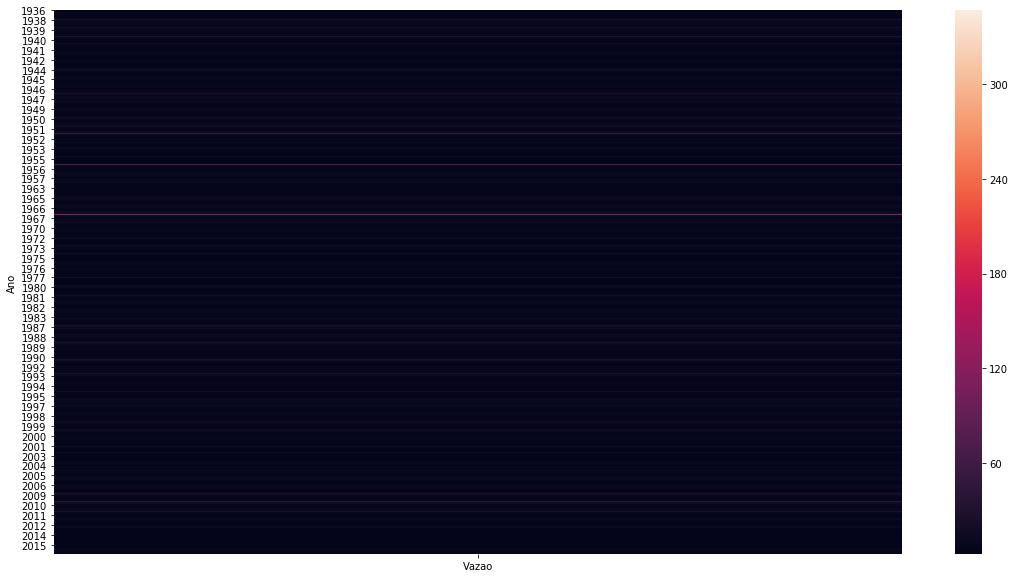

In [12]:
baseDados[['Vazao', 'Ano']].set_index('Ano')
plt.figure(figsize=[19,10])
sns.heatmap(baseDados[['Vazao', 'Ano']].set_index('Ano')[nOutlier])

# Algumas Observações

- A variação da vazão é muito grande entre anos vizinhos, pode ser algum erro
- Existem anos com muito menos dados que outros por exemplo 2009, 2007 pode ter sido alguma falha na estação na época 
- 2016 está incompleto



In [13]:
baseDados[['Vazao', 'Mes']].groupby('Mes').describe()

Vazao                                                                  \
      count       mean        std       min       25%        50%        75%   
Mes                                                                           
1    2464.0  12.122831  14.066405  2.589800  7.373000   9.788000  13.460000   
2    2243.0  12.734924  15.311290  2.971100  7.772000  10.476600  14.500000   
3    2450.0  12.458082   8.791078  3.566200  8.004800  10.440000  14.206405   
4    2400.0  10.657012   6.789628  3.821000  7.128000   9.376000  12.160000   
5    2480.0   8.080353   3.222022  3.756400  6.059838   7.404000   9.390000   
6    2400.0   6.757749   7.407274  3.104135  5.147972   6.060345   7.500000   
7    2449.0   5.649027   2.299675  2.754617  4.430100   5.203200   6.384000   
8    2449.0   4.909574   2.404914  2.317902  3.858693   4.572200   5.398293   
9    2370.0   5.016266   2.515227  2.440000  3.618000   4.405764   5.466000   
10   2462.0   5.629681   3.259123  2.230000  3.792000   4.830000   6.300000   
11   2397.0   6.958912   6.227936  2.230000  4.452000   5.742828   7.679244   
12   2475.0   9.318544   7.893749  2.642500  5.617000   7.500000  10.520000   

               
          max  
Mes            
1    508.5000  
2    566.0000  
3    195.3000  
4    134.4535  
5     58.0500  
6    347.0000  
7     58.0300  
8     84.7000  
9     32.9500  
10    49.9100  
11   196.6000  
12   177.2000

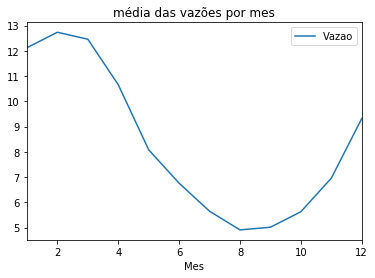

In [14]:
baseDados[['Vazao', 'Mes']].groupby('Mes').mean().plot()
plt.title('média das vazões por mes')
plt.show()

In [15]:
# print(sorted(baseDados[['Vazao', 'Ano']].groupby('Ano')))
# plt.title('plot das vazões por mes')
# plt.show()

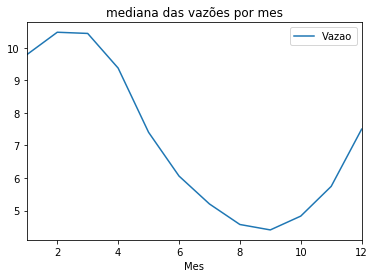

In [16]:
baseDados[['Vazao', 'Mes']].groupby('Mes').median().plot()
plt.title('mediana das vazões por mes')
plt.show()

# Algumas Observações

- O minimo de vazão é muito regular enqunto o max flutua muito
- O gráfico parece muito o ENaSud talvez devido a importancia do Paraiba do Sul para a Região sudeste
- Provavelmente os meses com maior flutuação no std jan, fev, mar serão os mais dificeis de criar a relação
- As medianas são muito estáveis e parecidas, um sinal de robustez e presença de padrão entre os meses 


In [17]:
# grupos = baseDados[['Vazao', 'Mes']].groupby('Mes')
# for grupo, num in zip(grupos, range(1, len(grupos)+1)):
#     pd.DataFrame(grupo[1]).boxplot()   
#     plt.tight_layout()
#     plt.title('boxPlotMes'+str(num))
#     plt.savefig('saida/boxPlotporMes'+str(num)+'.eps')
#     plt.show()
     
# # plt.savefig('saida/boxPlotporAno.eps')


# o Rio tem secado?

### Afirmação no site da Ana:

Mesmo com o importante papel no cenário nacional, a bacia hidrográfica do rio Paraíba do Sul **passa por uma das piores secas desde o início dos registros dos níveis dos rios, em 1930.** Como medida para o enfrentamento dessa crise de escassez hídrica, a Agência Nacional de Águas (ANA) vem emitindo resoluções com o objetivo de preservar os estoques disponíveis de água no reservatório equivalente desta Bacia, composto pelos barramentos de Paraibuna, Santa Branca, Jaguari e Funil. E os planos de ações complementares descrevem medidas adicionais para minimizar os efeitos deste período crítico.

Site ANA :
http://www3.ana.gov.br/portal/ANA/sala-de-situacao/paraiba-do-sul/paraiba-do-sul-saiba-mais

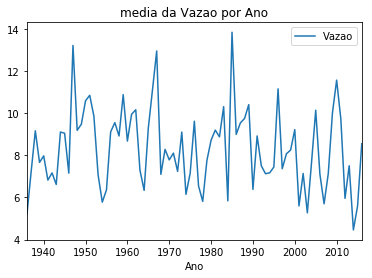

In [18]:
baseDados[['Vazao','Ano']].groupby('Ano').mean().plot()
plt.title('media da Vazao por Ano')
plt.show()

In [19]:
# listaVazaoPorAno=[x for x in baseDados[['Vazao','Ano']].groupby('Ano')]
# numAnos = len(listaVazaoPorAno)
# print(int(numAnos/3))
# for grupo, index in zip(listaVazaoPorAno, range(1,82)):
#     plt.subplot(int(numAnos/3), 3, index)
#     pd.DataFrame(grupo[1]['Vazao']).plot()
#     plt.title('vazao por mes no ano ' + str(grupo[0]))
# plt.show()

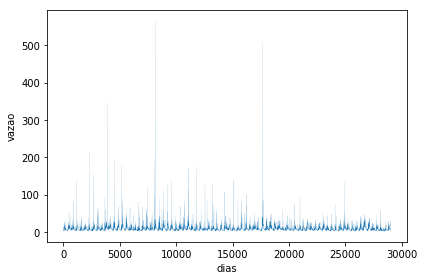

In [20]:
x = np.arange(len(baseDados))
plt.plot(x,baseDados['Vazao'], linestyle='-', linewidth=0.1)
plt.xlabel('dias')
plt.ylabel('vazao')
plt.tight_layout()
plt.savefig('saida/plot.eps')
plt.show()

### aparentemente a Vazao nao tem diminuido, pelas analises acima, ou seja, não parece ter sentido a afirmação no site da ANA, a nao ser que, seca não tenha relação com a Vazão

# Definicao do conjunto de treino, validacao, teste
 

In [21]:
tamTotal = len(baseDados)
tamConjuntoTreino = int(np.ceil(len(baseDados)*0.70))
tamConjuntoValidacao = int(np.floor(len(baseDados)*0.10))
tamConjuntoTeste = int(np.floor(len(baseDados)*0.20))
# xTreino = baseDados[:tamConjuntoTreino]
print(' tamanhoTotal', tamTotal,'\n', 'tamanhoTreino', tamConjuntoTreino,'\n', 'tamanhoValidacao', tamConjuntoValidacao,'\n', 'tamanhoTeste', tamConjuntoTeste)
print(' soma', tamConjuntoTreino+tamConjuntoTeste+tamConjuntoValidacao)

 tamanhoTotal 29039 
 tamanhoTreino 20328 
 tamanhoValidacao 2903 
 tamanhoTeste 5807
 soma 29038


In [22]:
treino = baseDados['Vazao'][:tamConjuntoTreino]
validacao = baseDados['Vazao'][tamConjuntoTreino: tamConjuntoTreino+tamConjuntoValidacao]
teste = baseDados['Vazao'][tamConjuntoTreino+tamConjuntoValidacao: ]
print( len(treino), len(validacao), len(teste))

20328 2903 5808


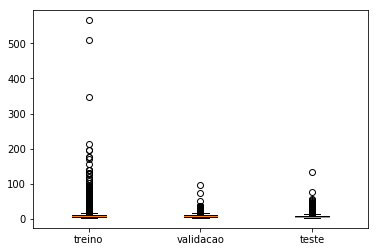

In [23]:
# df = pd.DataFrame({'Treino': treino, 'Validacao': validacao, 'Teste': teste})
plt.boxplot([treino, validacao, teste], labels=['treino', 'validacao', 'teste'])
# plt.boxplot(validacao)
# plt.boxplot(teste)
# df = pd.concat(treino, validacao)
plt.show()

### Aparentemente a escolha dos conjuntos está representativa no domínio do problema.

In [24]:
!7z a backup.7z * 


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Core(TM) i5-4210U CPU @ 1.70GHz (40651),ASM,AES-NI)

Open archive: backup.7z
--
Path = backup.7z
Type = 7z
Physical Size = 20067423
Headers Size = 1327
Method = LZMA2:24
Solid = +
Blocks = 1

Scanning the drive:
  0M Sca        3 folders, 98 files, 32913600 bytes (32 MiB)

Updating archive: backup.7z

Items to compress: 101

      3% 3 U backup.                  5% 3 U backup.                  7% 3 U backup.                 11% 3 U backup.                 15% 3 U backup.                 18% 3 U backup.                 22% 3 U backup.                 25% 3 U backup.                 28% 3 U backup.                 31% 3 U backup.                 33% 3 U backup.                 35% 3 U backup.                 37% 3 U backup.                 40% 3 U backup.                 42% 3 U backup.                 44% 3 U backup.                 46

In [25]:
!jupyter nbconvert analisaBase.ipynb --to slides --post serve

[NbConvertApp] Converting notebook analisaBase.ipynb to slides
[NbConvertApp] Writing 512412 bytes to analisaBase.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/analisaBase.slides.html
Use Control-C to stop this server
^C

Interrupted
